In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
plt.style.use('fivethirtyeight')

# Module 3 - Project: pendulum solutions

In this notebook, you will compare two solutions for the motion of a swinging pendulum

1. linearized solution for $\ddot{\theta}(t) = -\frac{g}{L}\theta$
2. numerical solution for $\ddot{\theta}(t) = -\frac{g}{L}\sin\theta$

You can choose your own pendulum length $L$ for the analysis. Try tying a string to an object and recording the swinging of the pendulum. You can estimate the initial angle and its period of oscillation. 

## 1. Linear solution

The linear solution is the first order Taylor series approximation for the equation of motion

$\ddot{\theta}(t) = -\frac{g}{L}\sin\theta \approx -\frac{g}{L}\theta$

The solution to this simple harmonic oscillator function is

$\theta(t) = \theta_0 \cos\omega t + \frac{\dot{\theta}_0}{\omega}\sin\omega t$

where $\theta_0$ is the initial angle, $\dot{\theta}_0$ is the initial angular velocity [in rad/s], and $\omega=\sqrt{\frac{g}{L}}$. 

Here, you can plot the solution for 

- $L = 1~m$
- $g = 9.81~m/s^2$
- $\theta_0 = \frac{\pi}{3} = [60^o]$
- $\dot{\theta}_0 = 0~rad/s$

Text(0, 0.5, '$\\theta(t)$ [degrees]')

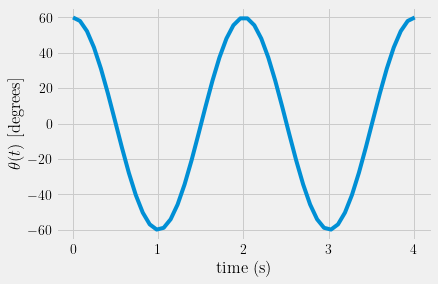

In [4]:
g = 9.81 # m/s/s
L = 1 # m
w = np.sqrt(g/L) # rad/s
t = np.linspace(0, 4*np.pi/w) # 2 time periods of motion
theta0 = np.pi/3
dtheta0 = 0

theta = theta0*np.cos(w*t) + dtheta0/w*np.sin(w*t)

plt.plot(t, theta*180/np.pi)
plt.xlabel('time (s)')
plt.ylabel(r'$\theta(t)$ [degrees]')

In the plot above, you should see harmonic motion. If it starts from rest at $60^o$ the pendulum will swing to $-60^o$ in $\frac{T}{2} =\frac{\pi}{\omega}$ seconds. 

## 2. Numerical solution 

In the numerical solution, there is no need to linearize the equation of motion. You _do_ need to create a __state__ variable as such

$\mathbf{x} = [x_1,~x_2] = [\theta,~\dot{\theta}]$

now, you can describe 2 first order equations in a function as such

1. $\dot{x}_1 = x_2$
2. $\dot{x}_2 = \ddot{\theta} =-\frac{g}{L}\sin\theta$

putting this in a Python function it becomes



In [5]:
g = 9.81
L = 1
def pendulum(t, x):
    '''pendulum equations of motion for theta and dtheta/dt
    arguments
    ---------
    t: current time
    x: current state variable [theta, dtheta/dt]
    outputs
    -------
    dx: current derivative of state variable [dtheta/dt, ddtheta/ddt]'''
    
    dx = np.zeros(len(x))
    dx[0] = x[1]
    dx[1] = -g/L*np.sin(x[0])
    return dx

This function `pendulum` defines the differential equation. Next, integrate with `solve_ivp` to find $\theta(t)$ as such. 

> __Note__: Here, I am using some previously defined values:
> - `theta0`: the initial angle
> - `dtheta0`: the initial angular velocity
> - `t`: the timesteps from the previous linear analysis $t = (0...2T)$

Text(0, 0.5, '$\\theta(t)$ [degrees]')

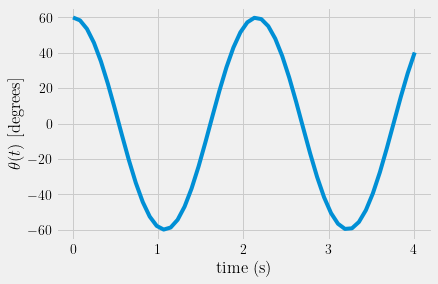

In [7]:
from scipy.integrate import solve_ivp

sol = solve_ivp(pendulum, [0, t.max()], [theta0, 0], t_eval = t)
plt.plot(sol.t, sol.y[0]*180/np.pi)
plt.xlabel('time (s)')
plt.ylabel(r'$\theta(t)$ [degrees]')

## Comparing results

At first glance, it would seem both solutions are _close enough_, but here you can plot them together and compare. 

Text(0, 0.5, '$\\theta(t)$ [degrees]')

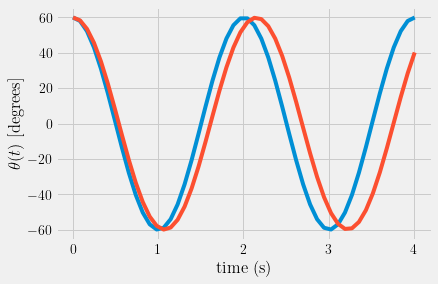

In [9]:
plt.plot(t, theta*180/np.pi)
plt.plot(sol.t, sol.y[0]*180/np.pi)
plt.xlabel('time (s)')
plt.ylabel(r'$\theta(t)$ [degrees]')

You should notice a difference in time period between the two solutions, which means the natural frequencies are different.

You can also consider angular velocity and angular acceleration, below a set of 3 plots are shown for $\theta(t),~\dot{\theta}(t),~and~\ddot{\theta}(t)$. 


In [33]:
dtheta = -theta0*w*np.sin(w*t) + dtheta0*np.cos(w*t)
ddtheta = -theta0*w**2*np.cos(w*t) - dtheta0*w*np.sin(w*t)

ddtheta_numerical = -g/L*np.sin(sol.y[0]) # using equation of motion

Text(0, 0.5, '$\\ddot{\\theta}(t)$ (rad/s$^2$)')

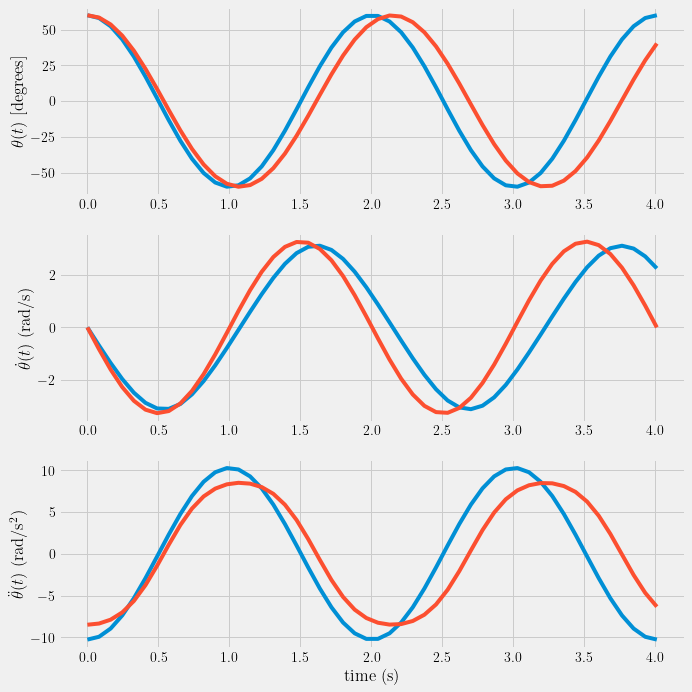

In [34]:
plt.figure(figsize= (10, 11))
plt.subplot(311)
plt.plot(t, theta*180/np.pi)
plt.plot(sol.t, sol.y[0]*180/np.pi)

plt.ylabel(r'$\theta(t)$ [degrees]')

plt.subplot(312)
plt.plot(sol.t, sol.y[1])
plt.plot(t, dtheta)

plt.ylabel(r'$\dot{\theta}(t)$ (rad/s)')


plt.subplot(313)
plt.plot(t, ddtheta)
plt.plot(t, ddtheta_numerical)
plt.xlabel('time (s)')
plt.ylabel(r'$\ddot{\theta}(t)$ (rad/s$^2$)')


### Question prompt
- Where do you see the biggest difference between the linearized solution and the numerical solution?
- What are ways you can quantify the error between then two results? Is one solution more _accurate_?
- What other calculations can you compare between these two solutions?